# ‚≠êÔ∏èÌîÑÎ°úÏ†ùÌä∏ : Îã§ÏñëÌïú OCRÎ™®Îç∏ ÎπÑÍµêÌïòÍ∏∞‚≠êÔ∏è
<Î£®Î∏åÎ¶≠>
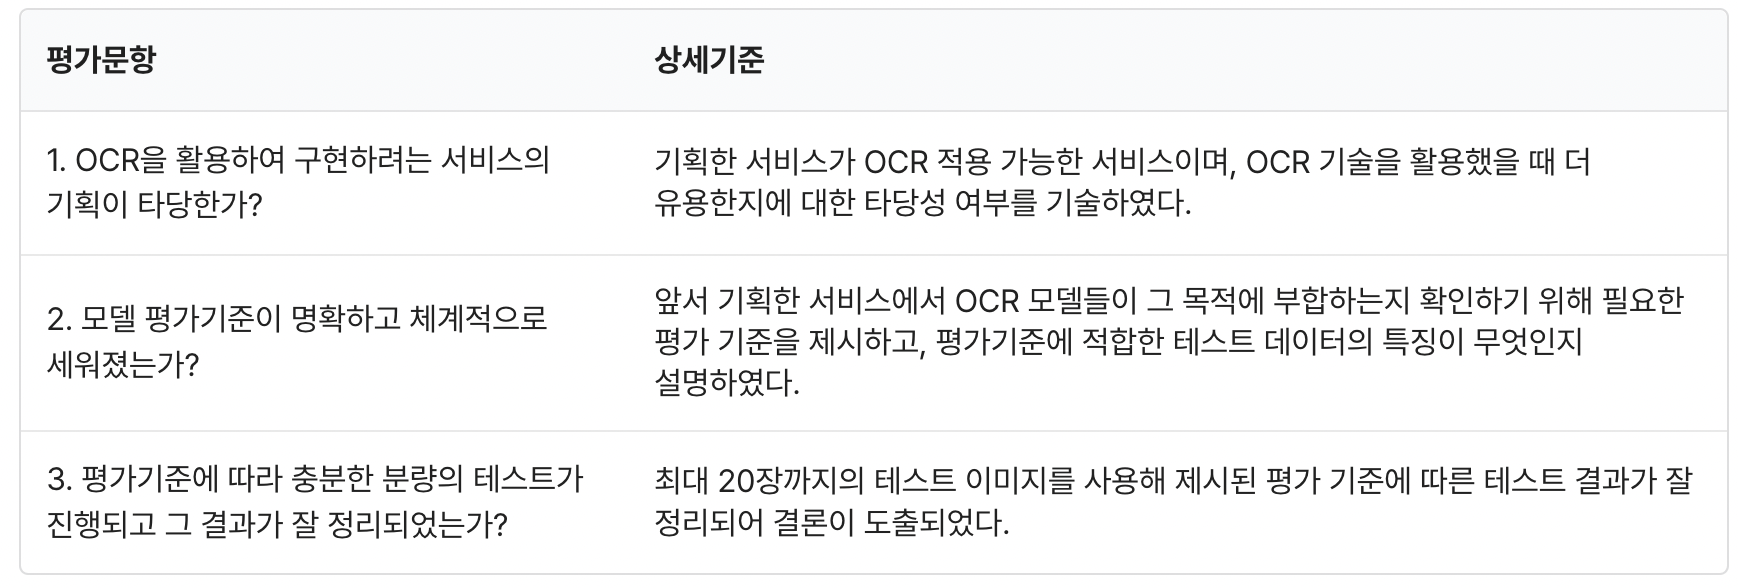

## Step1. Í≤ÄÏ¶ùÏö© Îç∞Ïù¥ÌÑ∞ÏÖã Ï§ÄÎπÑ


In [50]:
import keras_ocr
import pytesseract

print(keras_ocr.__version__)
print(pytesseract.__version__)
# pytesseractÎäî tesseract-ocrÏóê Ï¢ÖÏÜçÏ†ÅÏûÖÎãàÎã§. ÏïÑÎûò Î™ÖÎ†πÏñ¥Î•º ÌÜµÌï¥ ÏÑ§ÏπòÌï¥Ïïº Ìï† ÏàòÎèÑ ÏûàÏäµÎãàÎã§.
# !sudo apt install tesseract-ocr

0.8.8
0.3.8


## Step2. keras-ocr, TesseractÎ°ú ÌÖåÏä§Ìä∏ ÏßÑÌñâ(Google OCR APIÎäî ÏÑ†ÌÉù ÏÇ¨Ìï≠)
ÏúÑ Îëê Í∞ÄÏßÄ Î™®ÎìàÏùÑ ÌôúÏö©ÌïòÎäî Î∞©Î≤ïÏóê ÎåÄÌï¥ÏÑúÎäî ÏΩîÎìú Î†àÎ≤®Î°ú Ïù¥ÎØ∏ Í≤ΩÌóòÌï¥ Î≥¥ÏÖ®ÏùÑ Í≤ÉÏûÖÎãàÎã§. Ïù¥ÎØ∏ÏßÄ Î¶¨Ïä§Ìä∏Î•º Ï†ïÎ¶¨Ìïú ÌõÑ Î∞òÎ≥µÎ¨∏ÏùÑ Ïã§ÌñâÌïòÎ©∞ Î™®ÎìàÏù¥ Ï∂úÎ†•Ìïú Í≤∞Í≥ºÎ•º Î™®ÏïÑ Î¥ÖÏãúÎã§. Í∞ÄÎä•ÌïòÎã§Î©¥ Google OCR APIÎ•º Ìè¨Ìï®Ìï¥ ÏÑ∏ Í∞ÄÏßÄ Î™®ÎìàÏùÑ Îã§ Ïç®Î≥¥ÏÑ∏Ïöî.

### 1) Keras-ocr

In [11]:
import matplotlib.pyplot as plt
import keras_ocr

# keras-ocrÏù¥ detectorÍ≥º recognizerÎ•º ÏúÑÌïú Î™®Îç∏ÏùÑ ÏûêÎèôÏúºÎ°ú Îã§Ïö¥Î°úÎìúÎ∞õÍ≤å Îê©ÎãàÎã§. 
pipeline = keras_ocr.pipeline.Pipeline()

Looking for /aiffel/.keras-ocr/craft_mlt_25k.h5
Looking for /aiffel/.keras-ocr/crnn_kurapan.h5


In [3]:
import os

image_paths = [
    os.getenv('HOME')+'/aiffel/ocr_python/sample/keras_ocr/AnyConv.com__eng_1.jpg',
    os.getenv('HOME')+'/aiffel/ocr_python/sample/keras_ocr/AnyConv.com__eng_2.jpg',
    os.getenv('HOME')+'/aiffel/ocr_python/sample/keras_ocr/AnyConv.com__eng_3.jpg',
    os.getenv('HOME')+'/aiffel/ocr_python/sample/keras_ocr/AnyConv.com__eng_4.jpg',
    os.getenv('HOME')+'/aiffel/ocr_python/sample/keras_ocr/AnyConv.com__eng_5.jpg',
    os.getenv('HOME')+'/aiffel/ocr_python/sample/keras_ocr/AnyConv.com__eng_6.jpg',
    os.getenv('HOME')+'/aiffel/ocr_python/sample/keras_ocr/AnyConv.com__eng_7.jpg'
]

images = [ keras_ocr.tools.read(path) for path in image_paths]
prediction_groups = [pipeline.recognize([path]) for path in image_paths]

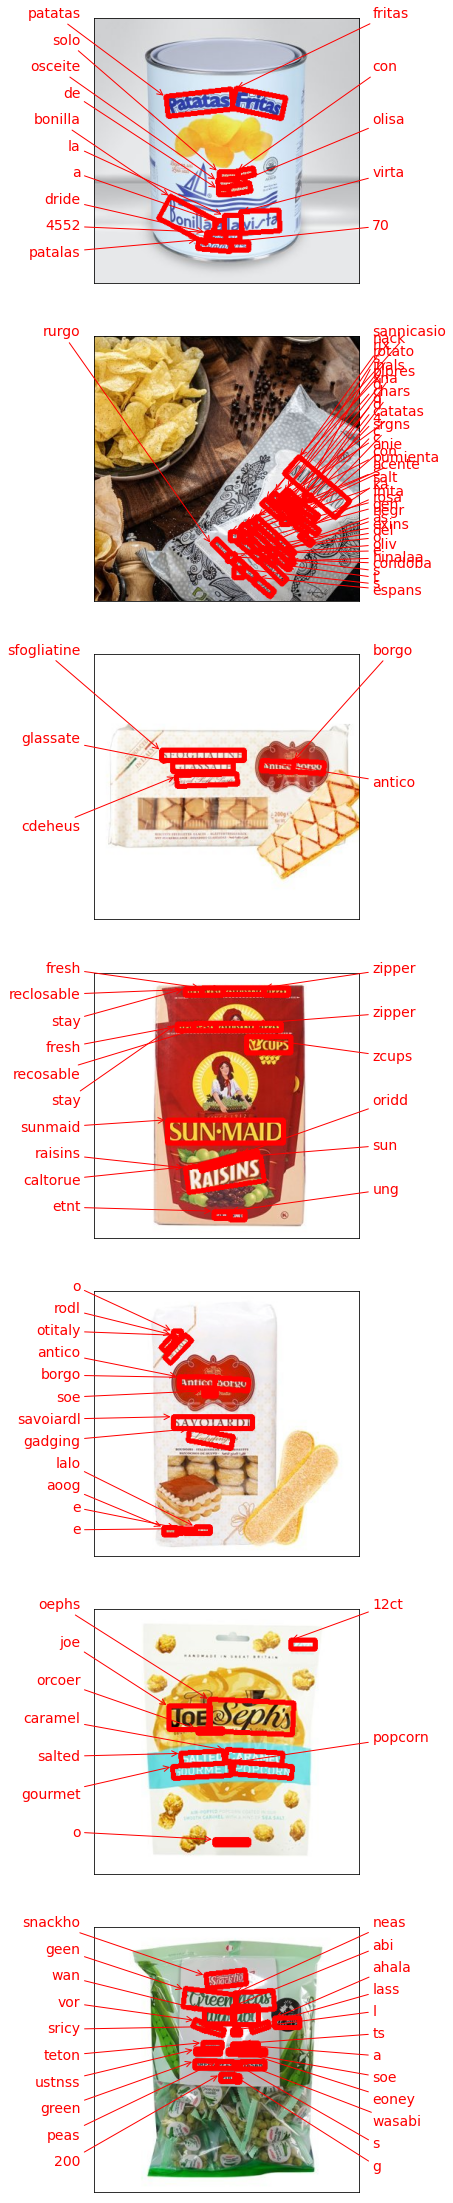

In [5]:
# Plot the predictions
fig, axs = plt.subplots(nrows=len(images), figsize=(40, 40))
for idx, ax in enumerate(axs):
    keras_ocr.tools.drawAnnotations(image=images[idx], 
                                    predictions=prediction_groups[idx][0], ax=ax)

### 2) Tesseract

In [48]:
import os
import pytesseract
from PIL import Image
import cv2
from pytesseract import Output
import matplotlib.pyplot as plt



def crop_word_regions(image_path='./images/sample.png', output_path='./output'):
    if not os.path.exists(output_path):
        os.mkdir(output_path)
    custom_oem_psm_config = r'--oem 3 --psm 3'
    image = Image.open(image_path)

    recognized_data = pytesseract.image_to_data(
        image, lang='kor',    # ÌïúÍµ≠Ïñ¥ÎùºÎ©¥ lang='kor'
        config=custom_oem_psm_config,
        output_type=Output.DICT
    )
    
    top_level = max(recognized_data['level'])
    index = 0
    cropped_image_path_list = []
    for i in range(len(recognized_data['level'])):
        level = recognized_data['level'][i]
    
        if level == top_level:
            left = recognized_data['left'][i]
            top = recognized_data['top'][i]
            width = recognized_data['width'][i]
            height = recognized_data['height'][i]
            
            output_img_path = os.path.join(output_path, f"{str(index).zfill(4)}.png")
            print(output_img_path)
            cropped_image = image.crop((
                left,
                top,
                left+width,
                top+height
            ))
            cropped_image.save(output_img_path)
            cropped_image_path_list.append(output_img_path)
            index += 1
    return cropped_image_path_list


work_dir = os.getenv('HOME')+'/aiffel/ocr_python/kor.jpg'
img_file_path = work_dir + '/kor_13.jpg'

cropped_image_path_list = crop_word_regions(img_file_path, work_dir)

/aiffel/aiffel/ocr_python/kor.jpg/0000.png
/aiffel/aiffel/ocr_python/kor.jpg/0001.png
/aiffel/aiffel/ocr_python/kor.jpg/0002.png
/aiffel/aiffel/ocr_python/kor.jpg/0003.png
/aiffel/aiffel/ocr_python/kor.jpg/0004.png
/aiffel/aiffel/ocr_python/kor.jpg/0005.png
/aiffel/aiffel/ocr_python/kor.jpg/0006.png
/aiffel/aiffel/ocr_python/kor.jpg/0007.png
/aiffel/aiffel/ocr_python/kor.jpg/0008.png
/aiffel/aiffel/ocr_python/kor.jpg/0009.png
/aiffel/aiffel/ocr_python/kor.jpg/0010.png
/aiffel/aiffel/ocr_python/kor.jpg/0011.png
/aiffel/aiffel/ocr_python/kor.jpg/0012.png
/aiffel/aiffel/ocr_python/kor.jpg/0013.png
/aiffel/aiffel/ocr_python/kor.jpg/0014.png


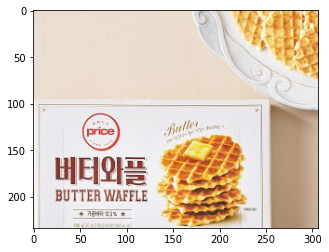

Í∞Ä



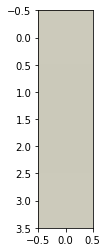

:



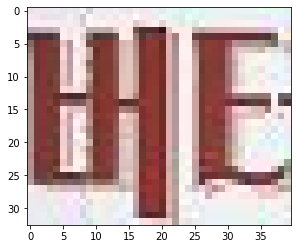

Î∞î



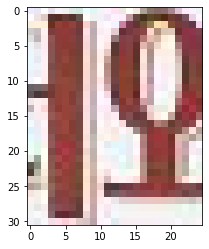

Î≥¥,



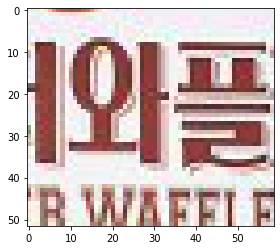

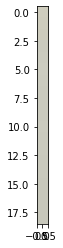

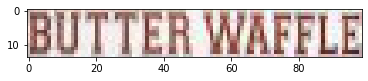

8101 ]ÌÉÄÎÑàÎÇò



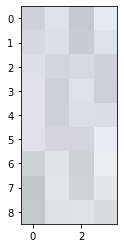

‚Äù



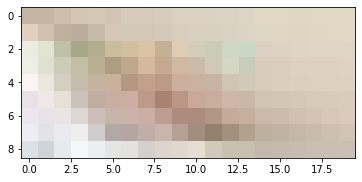

\



ÏïÑÏÑú Ïàò Í∏∞



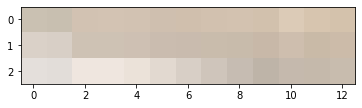

‚Äù--‚Ä¶



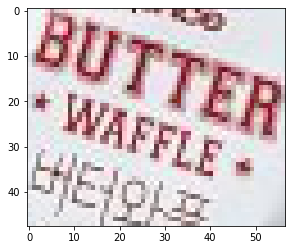

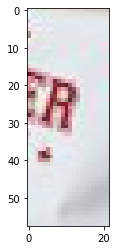

Îì§



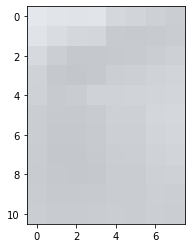

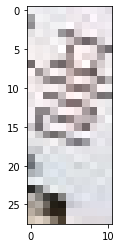


Done


In [49]:
def recognize_images_kor(cropped_image_path_list):
    custom_oem_psm_config = r'--oem 3 --psm 7'
    
    for image_path in cropped_image_path_list:
        image = Image.open(image_path)
        recognized_data = pytesseract.image_to_string(
            image, lang='kor',    
            config=custom_oem_psm_config,
            output_type=Output.DICT
        )
        
        import cv2
        img_bgr = cv2.imread(image_path)
        img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
        plt.imshow(img_rgb)
        plt.show()
        print(recognized_data['text'])
    print("Done")

# ÏúÑÏóêÏÑú Ï§ÄÎπÑÌïú Î¨∏Ïûê ÏòÅÏó≠ ÌååÏùºÎì§ÏùÑ Ïù∏ÏãùÌïòÏó¨ ÏñªÏñ¥ÏßÑ ÌÖçÏä§Ìä∏Î•º Ï∂úÎ†•Ìï©ÎãàÎã§.
recognize_images_kor(cropped_image_path_list)

Ïù≠,,,? Ï†ïÎÖïÏù¥Í≤å Îã§Ïù∏Í∞Ä„Öã„Öã„Öã„Öã

## Step3. ÌÖåÏä§Ìä∏ Í≤∞Í≥º Ï†ïÎ¶¨
#### keras-ocr
- Î™®ÎëêÎ•º Ïù∏ÏãùÌïòÏßÑ ÏïäÏßÄÎßå ÎåÄÎ∂ÄÎ∂ÑÏùò Ï≤†ÏûêÎ•º Ïûò Ïù∏ÏãùÌï¥ÏÑú Ïñ¥ÎäêÏ†ïÎèÑ Í≥ºÏûêÏóê ÎåÄÌïú Ï†ïÎ≥¥Î•º Ïïå ÏàòÏûàÎã§
- ÌïúÍ∏ÄÏùÑ ÏßÄÏõêÌïòÏßÄÏïäÏïÑ Î∂àÌé∏ÌñàÎã§.
- Ï∂úÎ†•ÌòïÌÉúÍ∞Ä Ìï¥ÎãπÏù¥ÎØ∏ÏßÄÏóêÏÑú Ïù∏ÏãùÌïú ÌÖçÏä§Ìä∏Î•º Î∞îÏö¥Îî©Î∞ïÏä§Î°ú ÌëúÏãúÌï¥Ï£ºÍ≥†, Î∞îÏö¥Îî©Î∞ïÏä§Ïóê Ïó∞Í≤∞Îêú ÌôîÏÇ¥ÌëúÏóê Ïù∏ÏãùÎêú ÌÖçÏä§Ìä∏Î•º ÌëúÏãúÌï¥Ï£ºÏñ¥ Î≥¥Í∏∞ Ìé∏ÌñàÎã§
#### tesseract
- ÌïúÍ∏ÄÏùÑ ÏßÄÏõêÌñàÏßÄÎßå Ï∂úÎ†•ÎêòÎäî Ï†ïÌôïÎèÑÍ∞Ä ÎÜíÏßÄ ÏïäÎã§
- Îã§ÏñëÌïú Ïù¥ÎØ∏ÏßÄÏôÄ ÏÑûÏó¨ÏûàÎäî ÌïúÍ∏ÄÏùò Í≤ΩÏö∞ Í∏ÄÏûêÏôÄ Ïù¥ÎØ∏ÏßÄÍ∞Ä 
- Ïù¥ÎØ∏ÏßÄÏùò ÌôîÏßàÏù¥ ÎÇÆÏïòÍ∏¥ÌñàÏßÄÎßå, Ï†úÎåÄÎ°ú Ïù∏ÏãùÌïú ÌÖçÏä§Ìä∏Í∞Ä ÎßéÏßÄÎäî ÏïäÎã§.
- keras-ocrÎ≥¥Îã§ ÏÑ±Îä•Ïù¥ ÎÇÆÎã§Í≥† ÌåêÎã®ÎêúÎã§.



## Step4. Í≤∞Í≥º Î∂ÑÏÑùÍ≥º Í≤∞Î°† Ï†úÏãú
Ïö∞ÏÑ† Ïó¨Îü¨Î∂ÑÎì§Ïù¥ Íµ¨ÌòÑÌïòÍ≥†Ïûê ÌïòÎäî ÏÑúÎπÑÏä§Ïùò Î™©Ï†ÅÍ≥º ÎÇ¥Ïö©ÏùÑ Î®ºÏ†Ä Ï†ïÎ¶¨Ìï©ÎãàÎã§. Ïó¨Îü¨Î∂ÑÎì§Ïù¥ Í≤ÄÌÜ†Ìïú OCR Î™®Îç∏Îì§Ïù¥ Í∑∏ Î™©Ï†ÅÏóê Î∂ÄÌï©ÌïòÎäîÏßÄ ÌôïÏù∏ÌïòÍ∏∞ ÏúÑÌï¥ ÌïÑÏöîÌïú ÌèâÍ∞Ä Í∏∞Ï§ÄÏùÑ Ï†úÏãúÌï©ÎãàÎã§. Í∑∏ Í∏∞Ï§ÄÏóê Îî∞Îùº ÏúÑÏóêÏÑú Ï†ïÎ¶¨Ìïú ÌÖåÏä§Ìä∏ Í≤∞Í≥ºÎ•º Î∂ÑÏÑùÌïòÏó¨ Í∞ÄÏû• ÎÇòÏùÄ ÎåÄÏïàÏùò Î™®Îç∏ÏùÑ ÏÑ†Ï†ïÌï©ÎãàÎã§
### Íµ¨ÌòÑÌïòÍ≥†ÏûêÌïòÎäî ÏÑúÎπÑÏä§
: Ï†ÄÏãúÎ†•ÏûêÎÇò ÏãúÍ∞ÅÏû•Ïï†Í∞Ä ÏûàÎäî ÏÇ¨ÎûåÎì§Ïù¥ Í≥ºÏûêÎ¥âÏßÄÎßå Í∞ÄÏßÄÍ≥† Ïñ¥Îñ§ Í≥ºÏûêÏù∏ÏßÄ Íµ¨Î∂ÑÌïòÍ∏∞ Ïñ¥Î†µÍ∏∞ÎïåÎ¨∏Ïóê Ïπ¥Î©îÎùºÎ•º ÌÜµÌï¥ Ïñ¥Îñ§ Í≥ºÏûêÎ¥âÏßÄÏù∏ÏßÄ Ïù∏ÏãùÌïòÍ≥†, Ìï¥Îãπ ÏÇ¨ÏßÑÏóê ÏûàÎäî ÌÖçÏä§Ìä∏Î•º ÏùΩÏñ¥Ï£ºÎäî ÏÑúÎπÑÏä§Î•º Íµ¨ÌòÑÌïòÍ≥†ÏûêÌï©ÎãàÎã§.

### ÏÑúÎπÑÏä§Î•º Íµ¨ÌòÑÌïòÍ∏∞ÏúÑÌïú ÌèâÍ∞Ä Í∏∞Ï§Ä
- ÌïúÍ∏ÄÏùÑ ÏßÄÏõêÌï¥ÏïºÌï®
- Ï†ÑÏ≤¥Ï†ÅÏù∏ Í∏ÄÏûêÎì§ÏùÑ Ïù∏ÏãùÌï¥ÏïºÎê®
- Ïò§Ï∞®Ïú®Ïù¥ Ï†ÅÏñ¥ÏïºÌï®
- Î™®Îç∏ÏÑ†Ï†ï
    - keras-ocrÏùò Í≤ΩÏö∞ ÏòÅÏñ¥Îßå ÏßÄÏõêÌïòÍ∏∞ ÎïåÎ¨∏Ïóê ÌïúÍµ≠ÏóêÏÑú ÏÇ¨Ïö©Ìï† ÏàòÎäî ÏóÜÎã§.(Í∞ÄÏû• ÌÅ∞ ÏïÑÏâ¨ÏõÄ)
    - ÌïòÏßÄÎßå tesseractÎäî ÌïúÍµ≠Ïñ¥Î•º Ïù∏ÏãùÌïòÏßÄÎßå Ï†ïÌôïÎèÑÍ∞Ä Îñ®Ïñ¥Ï†∏ Ï¢ãÏùÄ Î™®Îç∏Ïù¥Îùº Ìï† Ïàò ÏóÜÎã§.
    - kera-ocrÏùÄ Ï†ÑÏ†úÏù¥ÎØ∏ÏßÄÏóêÏÑú ÌÖçÏä§Ìä∏Î•º ÌïúÎ≤àÏóê Ïù∏ÏãùÌïòÍ≥† tesseractÎäî ÌÖçÏä§Ìä∏Î•º ÏúÑÏóêÏÑú ÏïÑÎûòÎ°ú, ÏôºÏ™ΩÏóêÏÑú Ïò§Î•∏Ï™ΩÏúºÎ°ú Î∂ÄÎ∂Ñ Ïù∏ÏãùÌïúÎã§.
    - keras-ocrÏùò Ïû•Ï†êÎì§Í≥º tesseractÏùò Ïû•Ï†êÏù¥ Ìï©Ï≥êÏßÑ Î™®Îç∏Ïù¥ ÏûàÎã§Î©¥ Ï¢ãÏùÑ Í≤ÉÍ∞ôÎã§.

### ‚úèÔ∏èÌöåÍ≥†
Ïù¥Î≤à Î™®Îç∏ÏùÄ Îç∞Ïù¥ÌÑ∞Î•º Î™®ÏúºÍ≥† Ï†ïÎ¶¨ÌïòÎäîÎç∞ ÏãúÍ∞ÑÏùÑ Îçî ÎßéÏù¥ Ïì¥Í≤É Í∞ôÎã§. Ï¢ãÏùÄ ÌôîÏßàÏùò Í≥ºÏûêÏÇ¨ÏßÑÏùÑ Íµ¨ÌïòÎäî Í≤ÉÏù¥ ÏÉùÍ∞ÅÎ≥¥Îã§ Ïñ¥Î†§Ïõ†Îã§. ÎòêÌïú Î¥âÏßÄÏùò Í≤ΩÏö∞ Î∂àÎπõÏóê Î∞òÏÇ¨ÎêòÎäî Î∂ÄÎ∂ÑÎèÑ ÎßéÏïÑ Ï†ïÌôïÌûà ÌïôÏäµÏù¥ Îê†ÏßÄÏóê ÎåÄÌïú ÏùòÎ¨∏Ïù¥ ÏûàÏóàÎã§.
Í∑∏Îü∞Îç∞ keras-ocrÏóêÏÑú ÌÖçÏä§Ìä∏ Ï∂úÎ†•ÏùÄ ÏûòÎêòÏñ¥ ÏãúÏûëÏù¥ Ï¢ãÏïòÎã§Í≥† ÏÉùÍ∞ÅÏù¥ Îì§ÏóàÏúºÎÇò tesseractÏùò Í≤ΩÏö∞ ÏòàÏÉÅÌïúÍ≤É Î≥¥Îã§ ÎÑàÎ¨¥ ÌÖçÏä§Ìä∏ Ï∂úÎ†•Ïùò Ï†ïÌôïÎèÑÍ∞Ä ÎÇÆÏïÑÏÑú Ïã§ÎßùÌïúÎ∂ÄÎ∂ÑÎèÑ ÏûàÏóàÎã§. ÎëêÍ∞ÄÏßÄ Î™®Îç∏ÏùÄ ÏÑúÎ°ú Ï∂úÎ†•ÌïòÎäî Î∞©ÏãùÏù¥ Îã¨ÎùºÏÑú ÏõêÌïòÎäî ÏÑúÎπÑÏä§Ïóê Îî∞Îùº ÏÑ†ÌÉùÏßÄÎèÑ Îã¨ÎùºÏßÄÎäîÍ≤ÉÍ∞ôÎã§.

Ïã§Ïäµ Ï§ë ÏõêÎûòÎäî ÏΩîÎû©ÏùÑ ÌôúÏö©Ìï¥ ÌïòÍ≥†ÏûàÎã§Í∞Ä. tesseractÎ•º ÏßÑÌñâÌï†Îïå ÎßâÌòîÏóàÎã§.. Ïù¥Ïú†Îäî crop_word_regions()ÏùÑ Íµ¨ÌòÑÌïòÎäîÎç∞ ÏûàÏñ¥ÏÑú Ïù¥ÎØ∏ÏßÄÎì§Ïùò Ï£ºÏÜåÎ∂ÄÎ∂ÑÎì§Ïù¥ ÎßêÏçΩÏù¥ÏóàÎã§. Í∑∏Î¶¨Í≥† ÎîîÎ†âÌÜ†Î¶¨Î•º ÏÉàÎ°ú ÎßåÎìúÎäîÎì± ÏΩîÎû©ÏóêÏÑú ÏßÑÌñâÌïòÍ∏∞ÏóêÎäî ÎÇòÏóêÍ≤åÎäî ÎßéÏùÄ Ïñ¥Î†§ÏõÄÏù¥ÏûàÏóàÎã§. Í∑∏ÎûòÏÑú Îã§Ïãú Ï£ºÌîºÌÑ∞Î°ú Ïã§ÌñâÌïòÏó¨ Ïñ¥ÎäêÏ†ïÎèÑ ÎßàÎ¨¥Î¶¨Î•º Ìï† Ïàò ÏûàÏóàÎã§. Ïù¥Î≤àÏóêÎèÑ ÏâΩÏßÑ ÏïäÏïòÎã§,,,ü•π